# LarryCy3sigma54

In [1]:
import torch
import pyro
import pyro.distributions as dist
import numpy as np
import pandas as pd
import os

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
import matplotlib.pyplot as plt

In [3]:
from scipy.io import loadmat

## Orange dye non-attenuated data

In [14]:
name = "LarryCy3sigma54"
path_data = "/shared/centaur/data/test/LarryCy3sigma54/"
path_results = "/shared/centaur/data/test/LarryCy3sigma54/runs/tracker/v1.1.3flat/S1/nocontrol/lr0.005/bs2/"

params_last = pd.read_csv(os.path.join(path_results, "params_last.csv"),
                          header=None, squeeze=True, index_col=0)
predictions = np.load(os.path.join(path_results, "predictions.npy"))
labels = np.load(os.path.join(path_data, "labels.npy"))

In [16]:
params_last.to_frame(name).T.drop(columns=[float("nan"), "pi_0", "lamda_0", "width_mode_0", "width_size_0"])

,iter,-ELBO,gain,pi_1,lamda_1,MCC,Recall,Precision,FN,TP,TN,FP
LarryCy3sigma54,9900.0,369780416.0,12.411028,0.092669,0.015413,0.965315,0.970517,0.966213,1231.0,40522.0,433068.0,1417.0


## Orange dye attenuated data

In [71]:
snr = [0.63, 0.79, 1.12, 1.41, 1.99, 2.81]

Tracker v1.1.3

In [72]:
results = {}
predictions = {}
true_labels = {}

names = ["FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob", "FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob",
         "FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob", "FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob",
         "FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob", "FL_1_1117_0OD_atten_noHysteresis_0p5_prob"]

for name in names:
    results[name] = pd.read_csv(
        "/shared/centaur/data/experimental/attenuated/{}/runs/tracker/v1.1.3flat/S1/nocontrol/lr0.005/bs10/params_last.csv"
        .format(name),
        header=None, squeeze=True, index_col=0)
    predictions[name] = np.load(
        "/shared/centaur/data/experimental/attenuated/{}/runs/tracker/v1.1.3flat/S1/nocontrol/lr0.005/bs10/predictions.npy"
        .format(name))
    true_labels[name] = np.load("/shared/centaur/data/experimental/attenuated/{}/labels.npy".format(name))

In [73]:
scores_v1p13 = pd.DataFrame(data=results).T.drop(columns=[float("nan"), "pi_0", "lamda_0", "width_mode_0", "width_size_0"])
scores_v1p13

,iter,-ELBO,gain,pi_1,lamda_1,MCC,Recall,Precision,FN,TP,TN,FP
FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob,29900.0,27305760.0,1.769059,0.003534,0.026631,0.389858,0.163389,0.947368,553.0,108.0,33744.0,6.0
FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob,29900.0,20433688.0,2.877008,0.014074,0.027418,0.502883,0.266805,0.992268,1058.0,385.0,23013.0,3.0
FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob,29900.0,25251286.0,5.252812,0.023329,0.002412,0.721728,0.591700,0.894737,305.0,442.0,26305.0,52.0
FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob,29900.0,31451082.0,6.725665,0.073904,0.008817,0.927197,0.890618,0.973711,232.0,1889.0,33878.0,51.0
FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob,29900.0,36758332.0,6.801042,0.042468,0.017617,0.941185,0.974702,0.910987,17.0,655.0,35391.0,64.0
FL_1_1117_0OD_atten_noHysteresis_0p5_prob,29900.0,44042968.0,6.901953,0.040881,0.093299,0.880256,0.980422,0.793902,13.0,651.0,41700.0,169.0


In [74]:
scores_sp = pd.DataFrame(data={"spMCC": [matthews_corrcoef(true_labels[name]["z"][true_labels[name]["z"]<2], true_labels[name]["spotpicker"][true_labels[name]["z"]<2]) for name in names],
                   "spRecall": [recall_score(true_labels[name]["z"][true_labels[name]["z"]<2], true_labels[name]["spotpicker"][true_labels[name]["z"]<2]) for name in names],
                   "spPrecision": [precision_score(true_labels[name]["z"][true_labels[name]["z"]<2], true_labels[name]["spotpicker"][true_labels[name]["z"]<2]) for name in names],
                    },
             index=names)
scores_sp

,spMCC,spRecall,spPrecision
FL_5555_6684_1p3OD_atten_noHysteresis_0p5_prob,0.426138,0.211800,0.875000
FL_4445_5554_1p1OD_atten_noHysteresis_0p5_prob,0.480272,0.244629,0.988796
FL_3339_4444_0p8OD_atten_noHysteresis_0p5_prob,0.674511,0.514056,0.901408
FL_2226_3338_0p6OD_atten_noHysteresis_0p5_prob,0.893359,0.857614,0.942976
FL_1118_2225_0p3OD_atten_noHysteresis_0p5_prob,0.910230,0.962798,0.863818
FL_1_1117_0OD_atten_noHysteresis_0p5_prob,0.840818,0.980422,0.725753


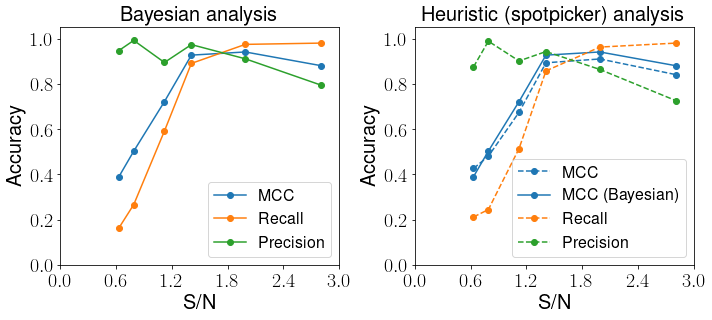

In [75]:
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.plot(snr, scores_v1p13["MCC"], "o-", label="MCC")
plt.plot(snr, scores_v1p13["Recall"], "o-", label="Recall")
plt.plot(snr, scores_v1p13["Precision"], "o-", label="Precision")

plt.ylim(0,1.05)
plt.xlim(0,1)
plt.xlabel(r"S/N", fontsize=20)
plt.ylabel(r"Accuracy", fontsize=20)
plt.title(r"Bayesian analysis", fontsize=20)

plt.gca().axes.get_xaxis().set_ticks(np.arange(6)*0.6)
plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=16)

plt.subplot(222)
plt.plot(snr, scores_sp["spMCC"], "o--", label="MCC")
plt.plot(snr, scores_v1p13["MCC"], "o-", color="C0", label="MCC (Bayesian)")
plt.plot(snr, scores_sp["spRecall"], "o--", label="Recall")
plt.plot(snr, scores_sp["spPrecision"], "o--", label="Precision")
plt.ylim(0,1.05)
plt.xlim(0,1)
plt.xlabel(r"S/N", fontsize=20)
plt.ylabel(r"Accuracy", fontsize=20)
plt.title(r"Heuristic (spotpicker) analysis", fontsize=20)

plt.gca().axes.get_xaxis().set_ticks(np.arange(6)*0.6)
plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=16)


plt.tight_layout()
plt.show()

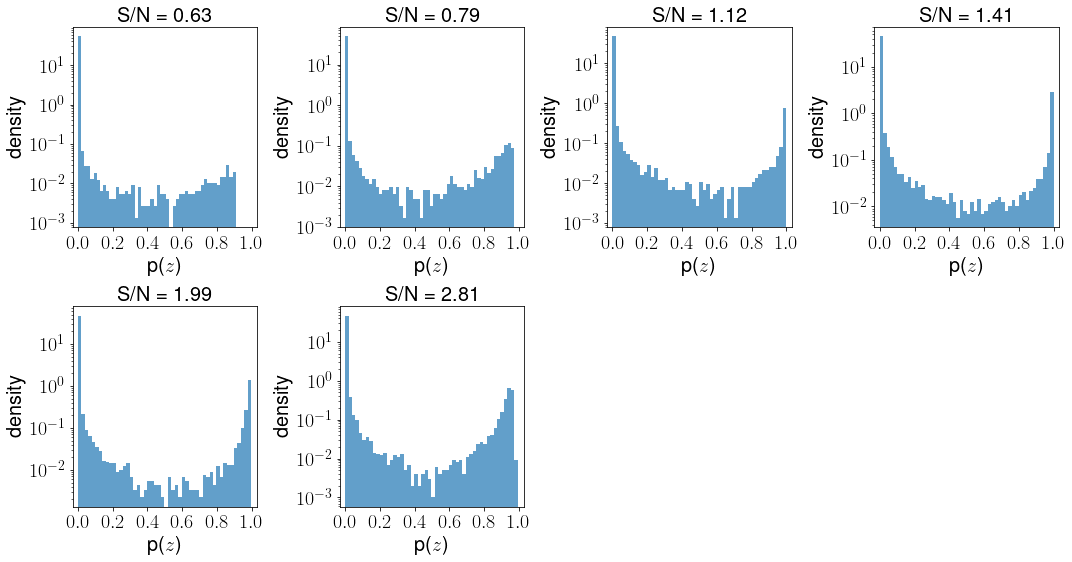

In [76]:
plt.figure(figsize=(15,15))
for i, name in enumerate(names):
    plt.subplot(4, 4, i+1)
    plt.hist(predictions[name]["z_prob"].ravel(), bins=50, density=True, alpha=0.7)
    plt.xlim(-0.03, 1.03)
    #plt.ylim(0, 10)
    plt.yscale('log', nonpositive='clip')
    #plt.gca().axes.get_xaxis().set_ticks([0.8, 0.9, 1])
    #plt.gca().axes.get_yaxis().set_ticks(np.arange(6)*0.2)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.xlabel(r"p($z$)", fontsize=20)
    plt.ylabel(r"density", fontsize=20)
    plt.title(r"S/N = {}".format(snr[i]), fontsize=20)

plt.tight_layout()
plt.show()